# 1. Load Modules

In [173]:
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import dates
import arcpy
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import datetime
#from datetime import datetime

# 2. Define functions for map formatting

In [143]:
def update_symbology_modes(date, airport_name):
    
    p = arcpy.mp.ArcGISProject("CURRENT")
    m = p.listMaps("Map")[0]
    #lyr = m.listLayers("MODES_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))[0]
    lyr = m.listLayers("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name))[0]
    sym = lyr.symbology
    sym.updateRenderer('GraduatedColorsRenderer')
    sym.renderer.classificationField = "GNSS_ALTD"
    colorRamp = p.listColorRamps("Blues (Continuous)")[0]
    sym.renderer.colorRamp = colorRamp

    # using natural breaks
    #sym.classificationMethod = 'NaturalBreaks'
    #sym.renderer.breakCount = 10

    # using manual interval
    sym.classificationMethod = 'ManualInterval'
    #classBreakValues = [100,200,500,1000,2000,5000,10000,15000]
    #classBreakLabels = ['<100','<200','<500','<1000','<2000','<5000','<10000','<15000']
    classBreakValues = [100,200,500,1000,1500]
    classBreakLabels = ['<100','<200','<500','<1000','<1500']
    
    sym.renderer.breakCount = len(classBreakValues)

    count = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = classBreakValues[count]
        brk.label = classBreakLabels[count]
        count += 1

    lyr.symbology = sym
    return(sym)

In [144]:
def update_symbology_amdar(date, airport_name):
    
    p = arcpy.mp.ArcGISProject("CURRENT")
    m = p.listMaps("Map")[0]
    #lyr = m.listLayers("AMDARS_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))[0]
    lyr = m.listLayers("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name))[0]
    sym = lyr.symbology
    sym.updateRenderer('GraduatedColorsRenderer')
    sym.renderer.classificationField = "ALTD"
    colorRamp = p.listColorRamps("Reds (Continuous)")[0]
    sym.renderer.colorRamp = colorRamp

    # using natural breaks
    #sym.classificationMethod = 'NaturalBreaks'
    #sym.renderer.breakCount = 10

    # using manual interval
    sym.classificationMethod = 'ManualInterval'
    #classBreakValues = [100,200,500,1000,2000,5000,10000,15000]
    #classBreakLabels = ['<100','<200','<500','<1000','<2000','<5000','<10000','<15000']
    classBreakValues = [100,200,500,1000,1500]
    classBreakLabels = ['<100','<200','<500','<1000','<1500']
    sym.renderer.breakCount = len(classBreakValues)

    count = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = classBreakValues[count]
        brk.label = classBreakLabels[count]
        count += 1

    lyr.symbology = sym
    return(sym)

# 3. Load data and select area

In [228]:
date_list = [20220919, 20220920]

airport_name_list = ['BelfastInt']
'''
airport_name_list = ['Heathrow', \
                     'Gatwick', \
                     'Manchester', \
                     'Stansted', \
                     'Edinburgh', \
                     'Birmingham', \
                     'Bristol', \
                     'Glasgow', \
                     'Aberdeen', \
                     'EastMidlands', \
                     'LondonCity', \
                     'BelfastInt', \
                     'Newcastle', \
                     'LeedsBradford', \
                     'Liverpool',\
                     'Cardiff']
'''

"\nairport_name_list = ['Heathrow',                      'Gatwick',                      'Manchester',                      'Stansted',                      'Edinburgh',                      'Birmingham',                      'Bristol',                      'Glasgow',                      'Aberdeen',                      'EastMidlands',                      'LondonCity',                      'BelfastInt',                      'Newcastle',                      'LeedsBradford',                      'Liverpool',                     'Cardiff']\n"

In [226]:
for airport_name in airport_name_list:
    for date in date_list:
        
        arcpy.management.XYTableToPoint(r"D:\MetDB\AMDARS\{0}\AMDARS_{1}.txt".format(airport_name,date), 
                                    r"C:\Users\gemma.daron\OneDrive - Met Office\ArcGISProProjects\ModeS\ModeS.gdb\AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name), 
                                    "LON", 
                                    "LAT", 
                                    None, 
                                    'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]];-400 -400 1000000000;-100000 10000;-100000 10000;8.98315284119521E-09;0.001;0.001;IsHighPrecision')
    
        arcpy.management.XYTableToPoint(r"D:\MetDB\Mode-S\{0}\MODE-S_{1}.txt".format(airport_name,date), 
                                    r"C:\Users\gemma.daron\OneDrive - Met Office\ArcGISProProjects\ModeS\ModeS.gdb\MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name), 
                                    "LON", 
                                    "LAT", 
                                    None, 
                                    'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]];-400 -400 1000000000;-100000 10000;-100000 10000;8.98315284119521E-09;0.001;0.001;IsHighPrecision')
       
    
    
        '''
        # Select features within specified area - DO WE REALLY NEED TO DO THIS IF WE ARE JUST LOOKING AT LOW ALTITUDE?
        arcpy.SelectLayerByLocation_management ("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name),
                                          "WITHIN",
                                          "{0}_buffer".format(airport_name))
        arcpy.CopyFeatures_management("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name), "AMDARS_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))
        #arcpy.Delete_management("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name))
    
        arcpy.SelectLayerByLocation_management ("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name),
                                          "WITHIN",
                                          "{0}_buffer".format(airport_name))
        arcpy.CopyFeatures_management("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name), "MODES_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))
        #arcpy.Delete_management("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name))    
        '''  
        update_symbology_amdar(date, airport_name)
        update_symbology_modes(date, airport_name)
    

# 4. Plot altitude (individual days)

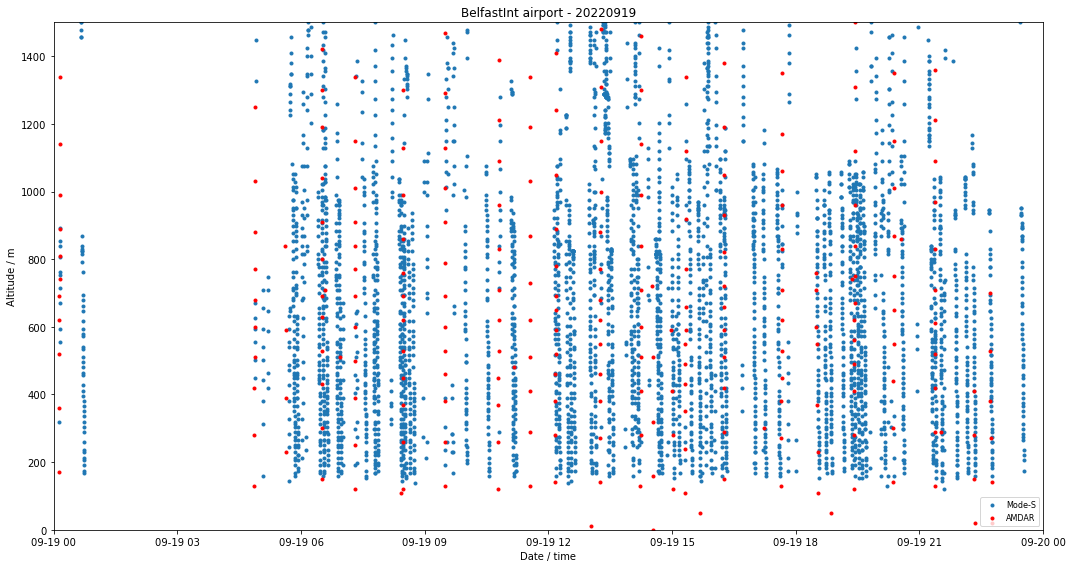

In [157]:
# Create data frame and plot altitude for individual days

for airport_name in airport_name_list:
    for date in date_list:
        
        # AMDAR data
                   
        #data_amdar = pd.DataFrame.spatial.from_featureclass("AMDARS_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))
        data_amdar = pd.DataFrame.spatial.from_featureclass("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        
        # Deal with missing seconds in data if present
        fields = arcpy.ListFields("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        for field in fields:
            if field.name == "TIME" and field.type == "String":
                data_amdar['TIME'] = data_amdar['TIME'].str.replace('--', '00') # replace null seconds with 00   

        data_amdar["TIME"] = pd.to_datetime(data_amdar["TIME"], format="%Y%m%d%H%M%S")
        data_amdar.set_index('TIME', inplace=True)
        
        # MODE-S data
    
        #data_mode_s = pd.DataFrame.spatial.from_featureclass("MODES_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))
        data_mode_s = pd.DataFrame.spatial.from_featureclass("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        
        # Deal with missing seconds in data if present
        fields = arcpy.ListFields("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        for field in fields:
            if field.name == "TIME" and field.type == "String":
                data_mode_s['TIME'] = data_mode_s['TIME'].str.replace('--', '00') # replace null seconds with 00   
        
        data_mode_s["TIME"] = pd.to_datetime(data_mode_s["TIME"], format="%Y%m%d%H%M%S")
        data_mode_s.set_index('TIME', inplace=True)
        
        # Plot data
    
        fig1, ax1 = plt.subplots(figsize=(15,8))
        plt.plot(data_mode_s['GNSS_ALTD'], marker='.', linestyle='None', label='Mode-S')
        plt.plot(data_amdar['ALTD'], marker='.', color='r', linestyle='None', label='AMDAR')
        ax1.set_xlabel('Date / time')
        ax1.set_ylabel('Altitude / m')
        plt.legend(loc='lower right', prop={'size':8})
        ax1.set_title('{0} airport - {1}'.format(airport_name, date))
        ax1.set_ylim([0, 1500])
        ax1.set_xlim([datetime.datetime(2022, 9, 19,0,0,0), datetime.datetime(2022, 9, 20,0,0,0)])
        plt.tight_layout()
        plt.savefig(os.path.join("D:/Mode-S_altitude/", "{0}_{1}.jpg".format(airport_name, date)))
        plt.show() 
        plt.close(fig1)

# 5. Plot altitude (multiple days)

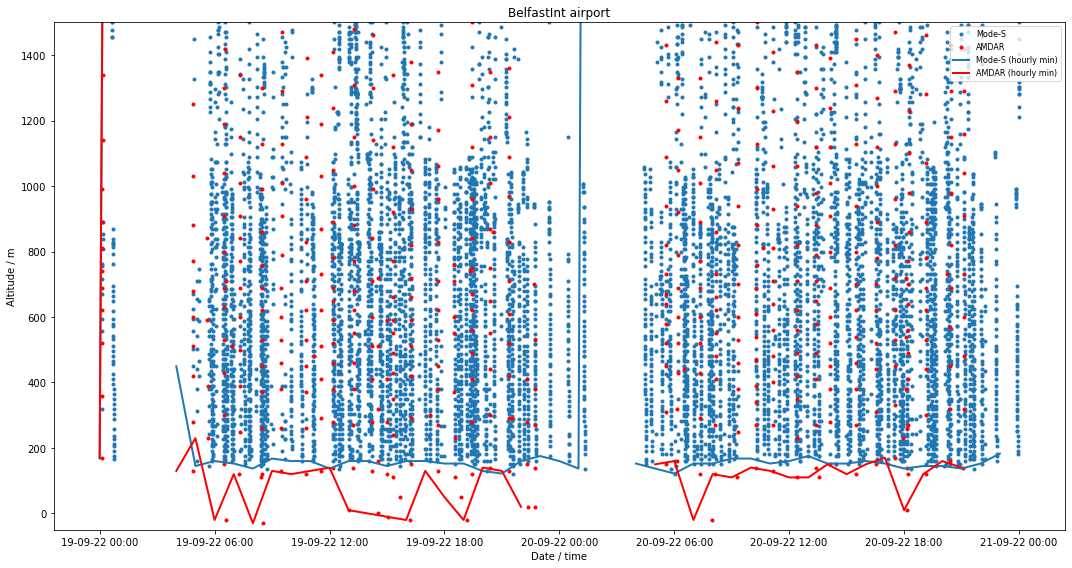

In [229]:
#append multiple days

# Create data frame and plot altitude

for airport_name in airport_name_list:
    
    concat_amdar = pd.DataFrame()
    concat_mode_s = pd.DataFrame()
    
    for date in date_list:

        # AMDAR data
                  
        #data_amdar = pd.DataFrame.spatial.from_featureclass("AMDARS_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))
        data_amdar = pd.DataFrame.spatial.from_featureclass("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        
        # Deal with missing seconds in data 
        fields = arcpy.ListFields("AMDARS_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        for field in fields:
            if field.name == "TIME" and field.type == "String":
                data_amdar['TIME'] = data_amdar['TIME'].str.replace('--', '00') # replace null seconds with 00   

        data_amdar["TIME"] = pd.to_datetime(data_amdar["TIME"], format="%Y%m%d%H%M%S")
        data_amdar.set_index('TIME', inplace=True)
        
        concat_amdar = pd.concat([concat_amdar, data_amdar])

        # MODE-S data
    
        #data_mode_s = pd.DataFrame.spatial.from_featureclass("MODES_{0}_XYTableToPoint2_{1}_selection".format(date, airport_name))
        data_mode_s = pd.DataFrame.spatial.from_featureclass("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        
        # Deal with missing seconds in data
        fields = arcpy.ListFields("MODES_{0}_XYTableToPoint2_{1}".format(date, airport_name))
        for field in fields:
            if field.name == "TIME" and field.type == "String":
                data_mode_s['TIME'] = data_mode_s['TIME'].str.replace('--', '00') # replace null seconds with 00   
        
        data_mode_s["TIME"] = pd.to_datetime(data_mode_s["TIME"], format="%Y%m%d%H%M%S")
        data_mode_s.set_index('TIME', inplace=True)
        
        concat_mode_s = pd.concat([concat_mode_s, data_mode_s])
        
    
    #Resample data and get hourly min altitude
    concat_amdar_hour = concat_amdar.resample('H').min()
    concat_mode_s_hour = concat_mode_s.resample('H').min()
   
    #diff = concat_mode_s_hour.subtract(concat_amdar_hour)
    diff = concat_mode_s_hour['GNSS_ALTD'] - concat_amdar_hour['ALTD']
    
    # Plot data 
    
    fig1, ax1 = plt.subplots(figsize=(15,8))
    plt.plot(concat_mode_s['GNSS_ALTD'], marker='.', linestyle='None', label='Mode-S')
    plt.plot(concat_amdar['ALTD'], marker='.', color='r', linestyle='None', label='AMDAR')
    plt.plot(concat_mode_s_hour['GNSS_ALTD'], color='#1f77b4', linewidth = 2, label='Mode-S (hourly min)')
    plt.plot(concat_amdar_hour['ALTD'], color='r', linewidth = 2, label='AMDAR (hourly min)')
    #plt.plot(diff, color='black', linewidth = 2, label='Mode-S - AMDAR (hourly min)')
    ax1.set_xlabel('Date / time')
    ax1.set_ylabel('Altitude / m')
    plt.legend(loc='upper right', prop={'size':8})
    ax1.set_title('{0} airport'.format(airport_name))
    ax1.set_ylim([-50, 1500])
            
    #ax1.set_xlim([datetime.datetime(2022, 9, 19,0,0,0), datetime.datetime(2022, 9, 20,0,0,0)])
    ax1.xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y %H:%M'))
    plt.tight_layout()
    plt.savefig(os.path.join("D:/Mode-S_altitude/", "{0}.jpg".format(airport_name)))
    plt.show() 
    plt.close(fig1)

    '''
    # Plot data separately
    
    fig2, ax2 = plt.subplots(figsize=(15,8))
    plt.plot(concat_mode_s_hour['GNSS_ALTD'], marker='.', linestyle='None', label='Mode-S')
    plt.plot(concat_amdar_hour['ALTD'], marker='.', color='r', linestyle='None', label='AMDAR')
    ax2.set_xlabel('Date / time')
    ax2.set_ylabel('Altitude / m')
    plt.legend(loc='lower right', prop={'size':8})
    ax2.set_title('{0} airport'.format(airport_name))
    ax2.set_ylim([-50, 1500])
            
    #ax1.set_xlim([datetime.datetime(2022, 9, 19,0,0,0), datetime.datetime(2022, 9, 20,0,0,0)])
    ax2.xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y %H:%M'))
    plt.tight_layout()
    #plt.savefig(os.path.join("D:/Mode-S_altitude/", "{0}.jpg".format(airport_name)))
    plt.show() 
    plt.close(fig2)
    '''